##### OpenCV 이미지 픽셀 연산

[1] 모듈 로딩 및 데이터 준비<hr>

In [39]:
## [1-1] 모듈로딩
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

In [40]:
## [1-2] 데이터 준비
img0 = np.zeros((300,300,3))     # 1채널:  np.zeros((300,300))
img1 = np.full_like(img0, 255)

print(f'img0 => {img0.shape}     img1 => {img1.shape}')

img0 => (300, 300, 3)     img1 => (300, 300, 3)


[2] 이미지 데이터 시각화 <hr>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [255.0..255.0].


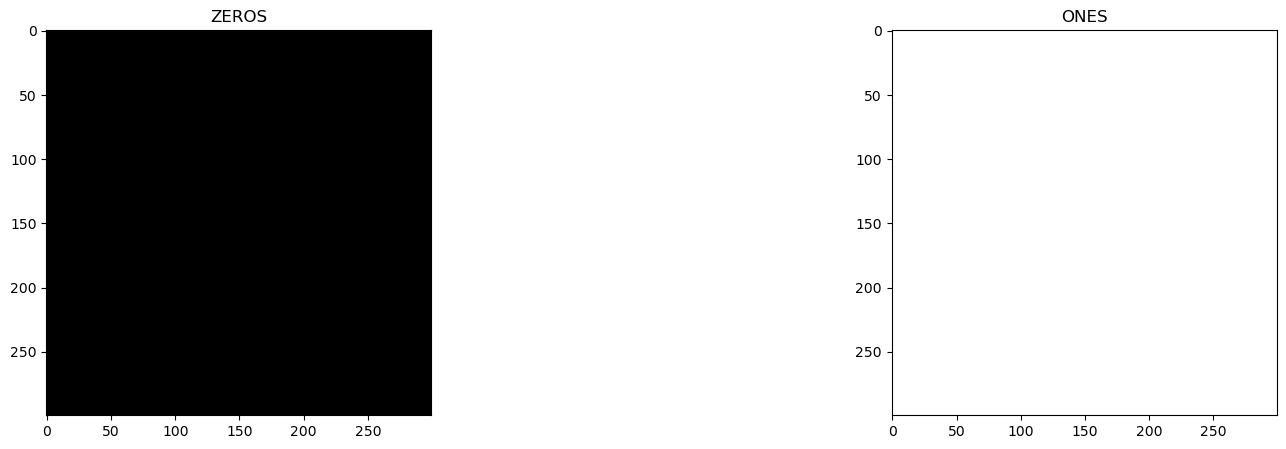

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for ax, img, title in zip(axes, [img0, img1], ['ZEROS','ONES']):
    ax.imshow(img)
    ax.set_title(title)
plt.show()

[3] 이미지 픽셀 연산 <hr>

img0_0 => (300, 300, 3) 
[[[120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]]]
int64


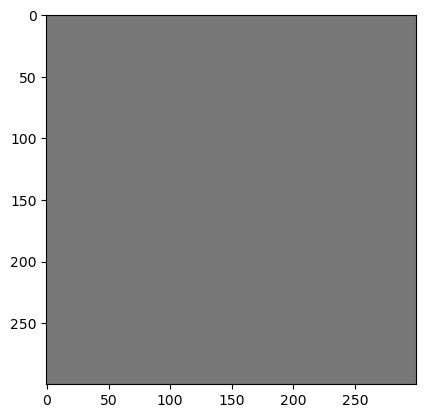

In [42]:
## 픽셀 단위 덧셈 연산
img0_0 = (img0 + 120).astype(int)
print(f'img0_0 => {img0_0.shape} \n{img0_0[:3, :3]}')

print(img0_0.dtype)
# img0_0=img0_0.astype(int)
# print(img0_0.dtype)

# 이미지 픽셀값 => 정수 0~255, 정규화 실수 0.0 ~ 1.0
plt.imshow(img0_0)
plt.show()

img0_1 => (300, 300, 3) 
[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
img1_1 => (300, 300, 3) 
[[[25 25 25]
  [25 25 25]
  [25 25 25]]

 [[25 25 25]
  [25 25 25]
  [25 25 25]]

 [[25 25 25]
  [25 25 25]
  [25 25 25]]]


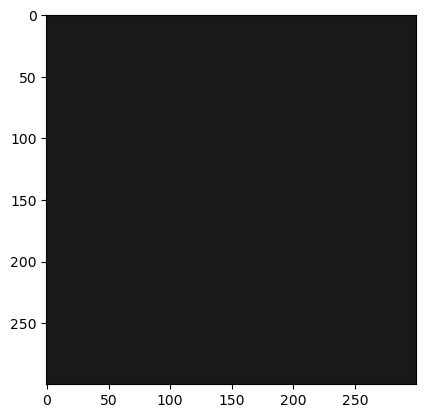

In [43]:
## 픽셀 단위 곱셈/나눗셈 연산
img0_1 = (img0 * 10).astype(int)
img1_1 = (img1 / 10).astype(int)
print(f'img0_1 => {img0_1.shape} \n{img0_1[:3, :3]}')
print(f'img1_1 => {img1_1.shape} \n{img1_1[:3, :3]}')

# 이미지 픽셀값 => 정수 0~255, 정규화 실수 0.0 ~ 1.0
plt.imshow(img1_1)
plt.show()

[4] 연산관련 함수 <hr>

In [44]:
## [4-1] 픽셀간 덧셈 연산 함수 add(이미지1, 이미지2) 
## - 이미지 합성, 필터 효과 적용시
## - 픽셀 값의 합의 범위 : 255초과 불가!, 255초과시 255로 값 설정
img0=img0.astype(np.uint8)
img1=img1.astype(np.uint8)

print(img0.dtype, img1.dtype)

uint8 uint8


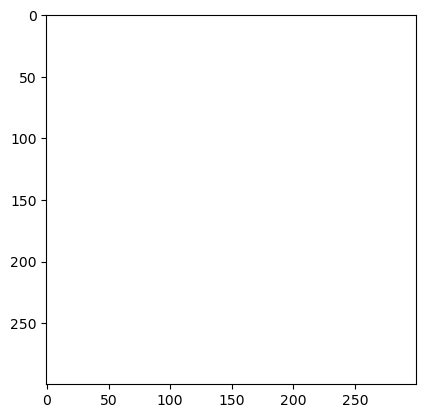

In [45]:
## [4-1-1] 연산 수행
result = cv2.add(img0, img1)

## 시각화
plt.imshow(result)
plt.show()

(284, 227, 3) (284, 227, 3)
(284, 227, 3) (284, 227, 3) (284, 227, 3)


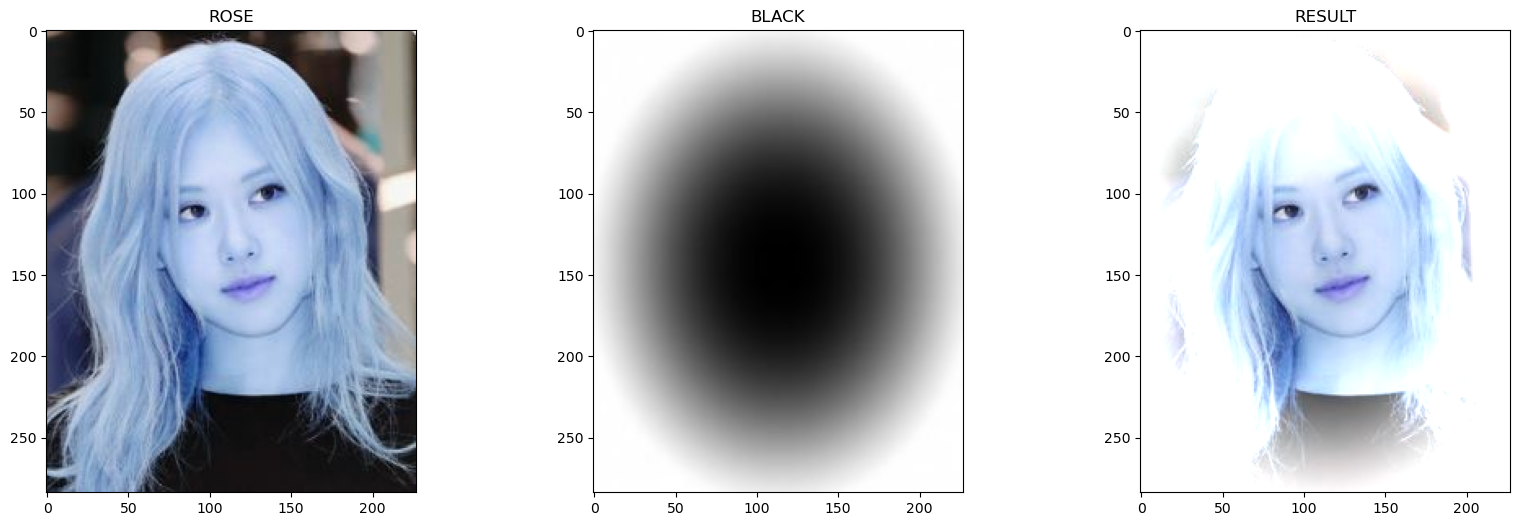

In [46]:
## [4-1-2] 합성하고자 하는 이미지 2개 로딩
## 조건 : 채널과 크기 동일해야함
rose=cv2.imread('../Data/Image/rose_01.jpg')
black=cv2.imread('../Data/Image/black_circle.jpg')
black=cv2.resize(black, (rose.shape[1], rose.shape[0]))

# 이미지 정보 확인
print(rose.shape, black.shape)

# 덧셈 연산
result = cv2.add(rose, black)
print(rose.shape, black.shape, result.shape)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, img, title in zip(axes, [rose, black, result], ['ROSE', 'BLACK', 'RESULT']):
    ax.imshow(img)
    ax.set_title(title)

plt.show()


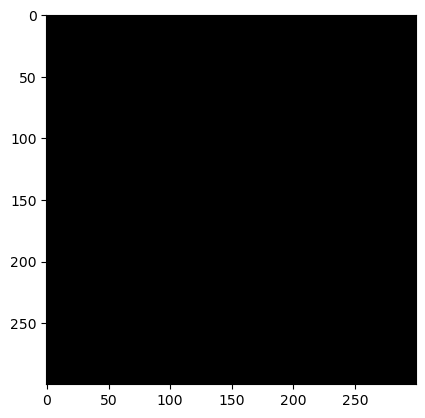

In [47]:
## [4-2] 픽셀간 뺄셈 연산 함수 subtract(이미지1, 이미지2) 
## - 이미지 간 차이점 분석, 특정 영역의 변화 감지 
## - 픽셀 값의 뺄셈의 범위 : 0미만 불가!, 0미만 즉 음수시 0으로 값 설정
## [4-2-1]
result = cv2.subtract(img0, img1)

## 시각화
plt.imshow(result)
plt.show()

(272, 303, 3) (272, 303, 3)
(272, 303, 3) (272, 303, 3) (272, 303, 3)


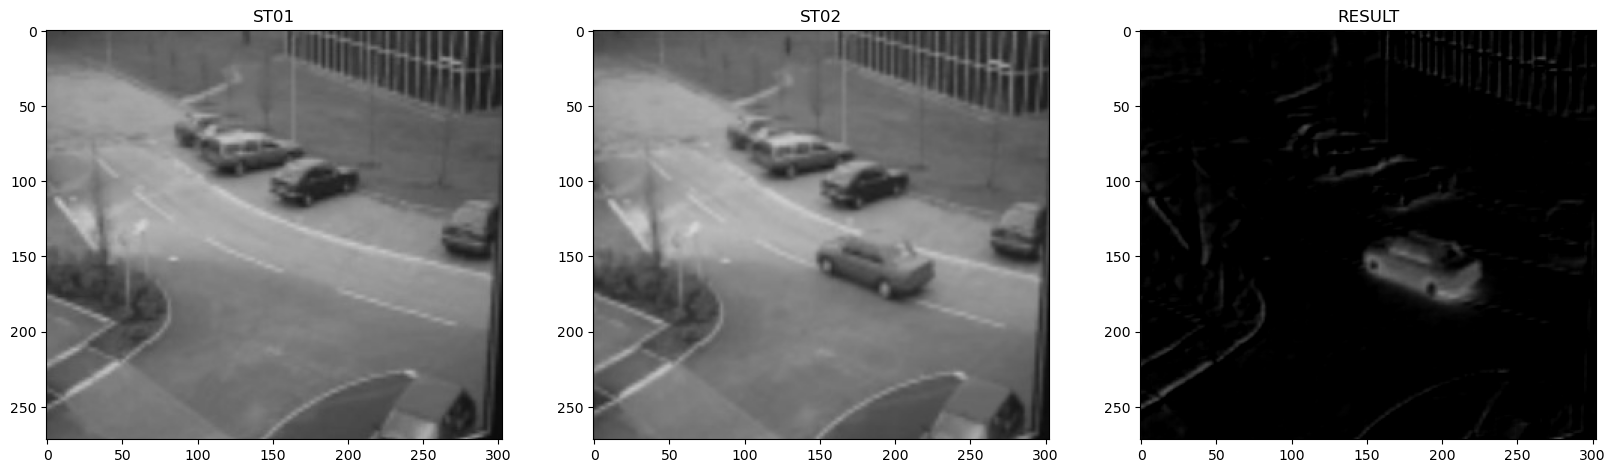

In [48]:
## [4-2-2] 변경/차이점 감지할 이미지 2개 로딩
## 조건 : 채널과 크기 동일해야함
street1=cv2.imread('../Data/Image/street_01.jpg')
street2=cv2.imread('../Data/Image/street_02.jpg')
street2=cv2.resize(street2, (street1.shape[1], street1.shape[0]))

# 이미지 정보 확인
print(street1.shape, street2.shape)

# 뺄셈 연산
result = cv2.subtract(street1, street2)
print(street1.shape, street2.shape, result.shape)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, img, title in zip(axes, [street1, street2, result], ['ST01', 'ST02', 'RESULT']):
    ax.imshow(img)
    ax.set_title(title)

plt.show()

[5] MASK 이미지를 활용한 합성<hr>
- mask/kernel => ROI영역을 255(흰색)으로 채운것, 나머지는 0(검은색)
- 내가 원하는 것만 추출 
- 이진 마스크(Binary Mask)

In [49]:
## 이미지 데이터 준비
ORI_FILE = '../data/image/airplain.bmp'
MASK_FILE = '../data/image/airplain_mask.bmp'
DEST_FILE = '../data/image/field.bmp'

In [50]:
## 이미지 데이터 로딩
oriNP = cv2.imread(ORI_FILE)
maskNP = cv2.imread(MASK_FILE, cv2.IMREAD_GRAYSCALE)
destNP = cv2.imread(DEST_FILE)
destNP2 = cv2.resize(destNP, (oriNP.shape[1], oriNP.shape[0]))

In [51]:
## 3개 이미지 가로/세로 모두 길이 같아야 함
print(f'oriNP => {oriNP.shape}, maskNP => {maskNP.shape}, destNP2 => {destNP2.shape}')


oriNP => (201, 299, 3), maskNP => (201, 299), destNP2 => (201, 299, 3)


In [52]:
## 이미지 합성
resultNP=cv2.copyTo(oriNP, maskNP, destNP2)

print(f'resultNP => {resultNP.shape}')

resultNP => (201, 299, 3)


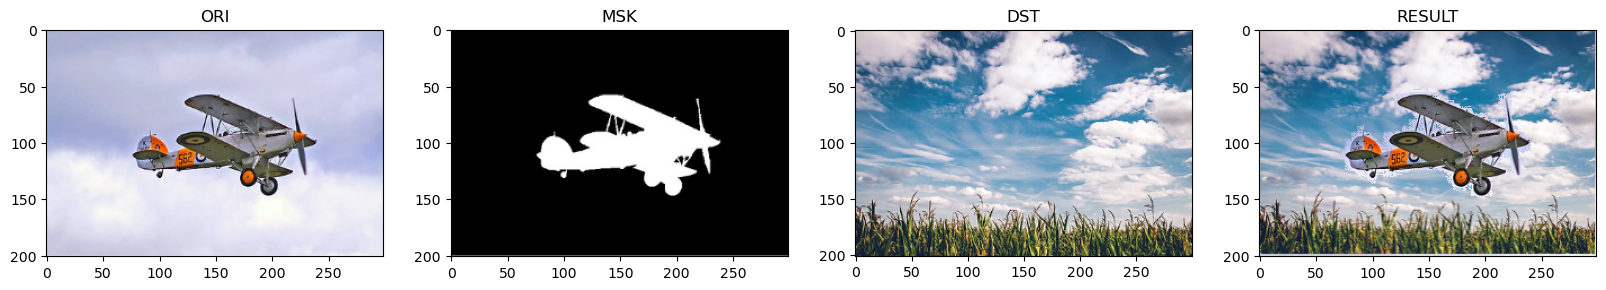

In [53]:
## 시각화
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for ax, img, title in zip(axes, [oriNP, maskNP, destNP, resultNP], ['ORI', 'MSK', 'DST', 'RESULT']):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)

plt.show()